In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
%matplotlib inline

## Cargar dataset

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Para instalar:
# !pip install pandas_profiling

In [8]:
import pandas_profiling as pp

In [9]:
report = pp.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Convertir datos categóricos a numéricos

In [11]:
df_numerical = df.drop(['sex', 'smoker', 'day', 'time'], axis=1)
df_numerical.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [12]:
df_categorical = df.filter(['sex', 'smoker', 'day', 'time'])
df_categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [13]:
pd.get_dummies(df_categorical)

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,1,0,0,1,0,0,1,0,0,1
240,0,1,1,0,0,0,1,0,0,1
241,1,0,1,0,0,0,1,0,0,1
242,1,0,0,1,0,0,1,0,0,1


In [14]:
df_categorical_num = pd.get_dummies(df_categorical, drop_first=True)
df_categorical_num.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


In [15]:
df_final = pd.concat([df_numerical, df_categorical_num], axis=1)
df_final.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


## EDAs

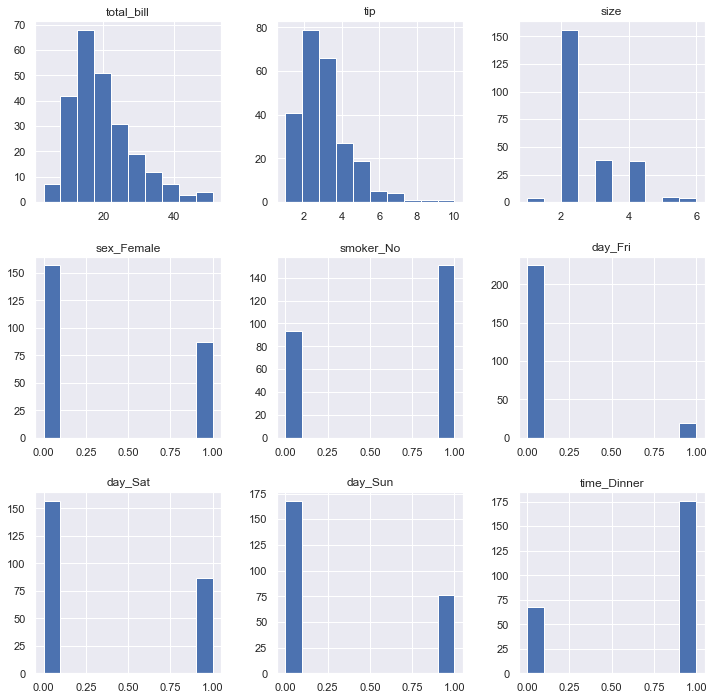

In [16]:
sns.set()
df_final.hist(figsize=(12, 12), bins=10)
plt.show()

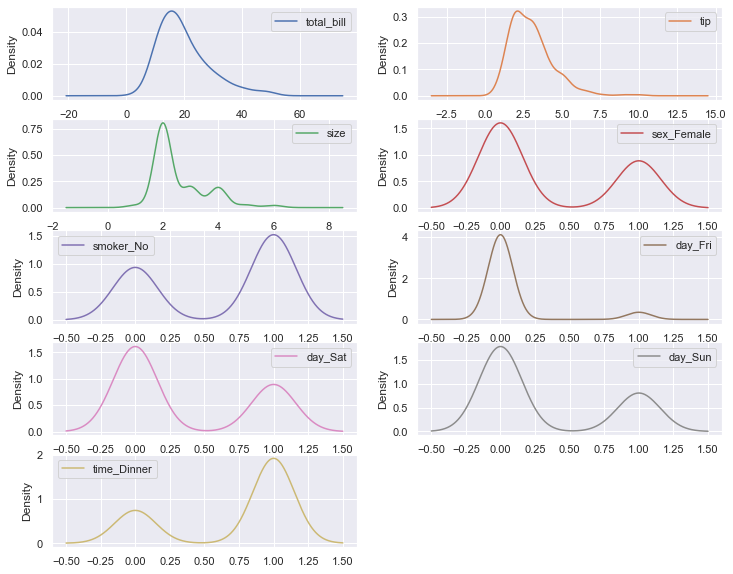

In [17]:
df_final.plot(kind='density', subplots=True, figsize=(12, 12), layout=(6,2), sharex=False)
plt.show()

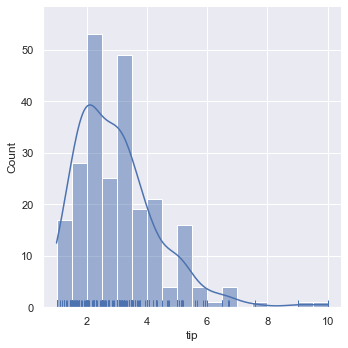

In [18]:
sns.displot(df_final['tip'], rug=True, kde=True)
plt.show()

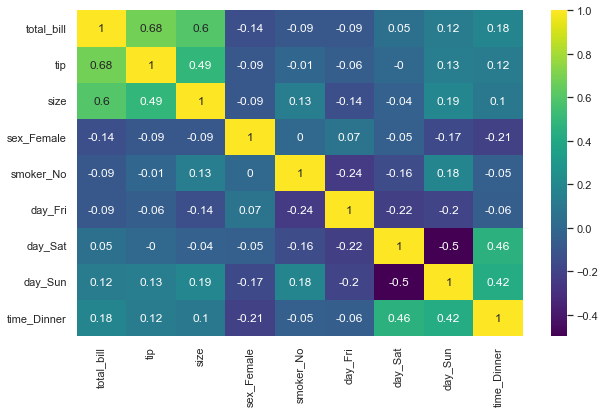

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_final.corr().round(2), annot=True, cmap='viridis')
plt.show()

total_bill        AxesSubplot(0.125,0.657941;0.227941x0.222059)
tip            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
size           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
sex_Female        AxesSubplot(0.125,0.391471;0.227941x0.222059)
smoker_No      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
day_Fri        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
day_Sat              AxesSubplot(0.125,0.125;0.227941x0.222059)
day_Sun           AxesSubplot(0.398529,0.125;0.227941x0.222059)
time_Dinner       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

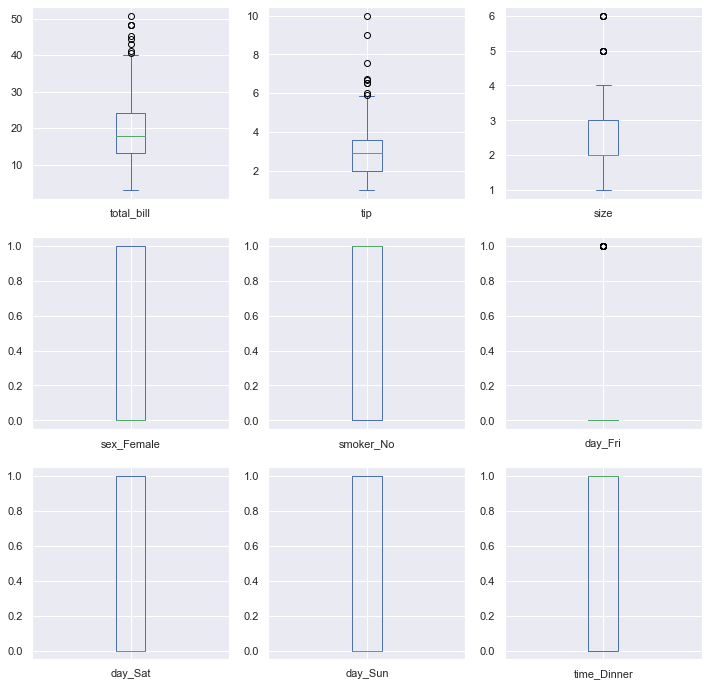

In [20]:
df_final.plot(kind='box', subplots=True, layout=(3,3), sharex=True, figsize=(12,12))

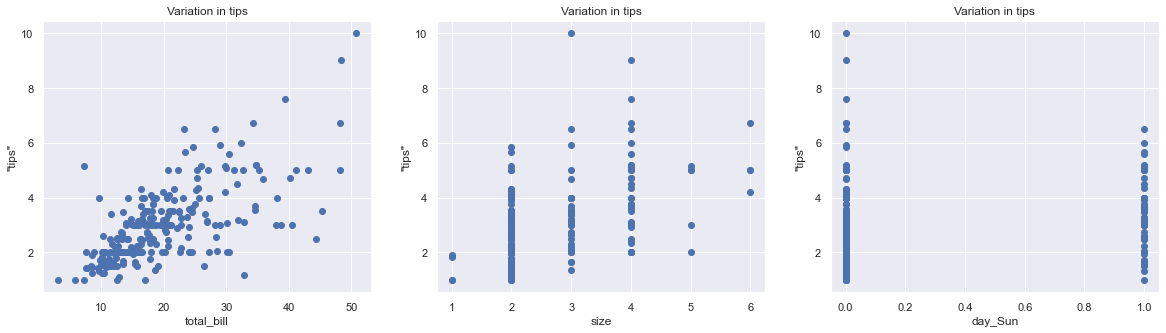

In [21]:
plt.figure(figsize=(20, 5))

features = ['total_bill', 'size', 'day_Sun']
target = df_final['tip']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_final[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in tips")
    plt.xlabel(col)
    plt.ylabel('"tips"')

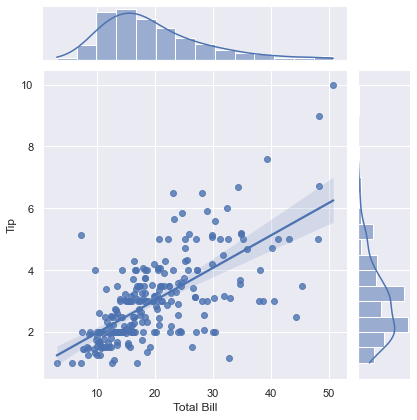

In [23]:
g = sns.jointplot(x='total_bill', y='tip', data=df_final, kind='reg')
g.set_axis_labels("Total Bill", "Tip")
plt.show()

## Modelado
Probar la regresión múltiple con variables de entrada más correlacionadas: total_bill, size

In [24]:
from sklearn.model_selection import train_test_split

X = df_final.filter(['total_bill', 'size'])
# X = df_cat.drop(['day_Sat', 'smoker_No'], axis=1)
y = df_final.filter(['tip'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [26]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

print('R2: ', r2_score(y_test, y_pred)) # coeficiente de determinación.
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2:  0.5931538868815657
MAE:  0.6424339446924844
